<hr><b> BUILDING A MOVIE CONTENT BASED RECOMMENDATION SYSTEM

<li>This dataframe lack user-specific data, which means that neither explicit (SVD) nor implicit (ALS) interactions nor user-provided movie ratings exist. Collaborative filtering techniques such as matrix factorization will not work in these kinds of situations. Since matrix factorization depends on user-item interactions, the data in our dataframe does not contain such information. However, we can base suggestions on similarity between movies because we have item-item (movie-movie) similarity. Thus, content-based filtering on columns like cast, crew, genres, keywords, overview, and so forth is possible.</li>

<li>Filtering by Content:</li>

<li>cast and crew: The information in these columns pertains to the actors, directors, and other members of the film's crew. With this information, content-based filtering might suggest films that are comparable to one another based on shared cast or crew members.</li>


<li>genres: Expounds upon the film's genres. On the basis of common genres, content-based filtering might suggest movies.
keywords: Lists keywords or tags related to the film. With the use of these keywords, content-based filtering might suggest films that cover related subjects or themes.</li>

<li>overview: Gives a succinct synopsis or explanation of the film. Content-based filtering is able to identify films with comparable themes or narratives by analyzing the textual content of synopses.

</li>


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Preprocess_MovieDataset.csv')
data.head()

,title,cast,budget,genres,keywords,original_title,overview,popularity,production_companies,production_countries,year,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,Avatar,"GiovanniRibisi, CCHPounder, LazAlonso, ZoeSald...",237000000,"Fantasy, Adventure, ScienceFiction, Action","futuristic, cultureclash, spacewar, society, f...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"DuneEntertainment, TwentiethCenturyFoxFilmCorp...","UnitedStatesofAmerica, UnitedKingdom",2009,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,7.2,11800
1,Pirates of the Caribbean: At World's End,"JohnnyDepp, ChowYun-fat, StellanSkarsgård, Kei...",300000000,"Adventure, Action, Fantasy","eastindiatradingcompany, drugabuse, alliance, ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"SecondMateProductions, WaltDisneyPictures, Jer...",UnitedStatesofAmerica,2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500
2,Spectre,"LéaSeydoux, AndrewScott, RoryKinnear, DaveBaut...",245000000,"Adventure, Crime, Action","secretagent, sequel, britishsecretservice, mi6...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Danjaq, ColumbiaPictures, B24","UnitedKingdom, UnitedStatesofAmerica",2015,880674609,148.0,"Italiano, Deutsch, English, Español, Français",Released,A Plan No One Escapes,6.3,4466
3,The Dark Knight Rises,"GaryOldman, MarionCotillard, TomHardy, JunoTem...",250000000,"Thriller, Drama, Crime, Action","vigilante, timebomb, burglar, gothamcity, dcco...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"WarnerBros., LegendaryPictures, DCEntertainmen...",UnitedStatesofAmerica,2012,1084939099,165.0,English,Released,The Legend Ends,7.6,9106
4,John Carter,"SamanthaMorton, CiaránHinds, JamesPurefoy, Tho...",260000000,"Adventure, ScienceFiction, Action","medallion, princess, edgarriceburroughs, based...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012,284139100,132.0,English,Released,"Lost in our world, found in another.",6.1,2124


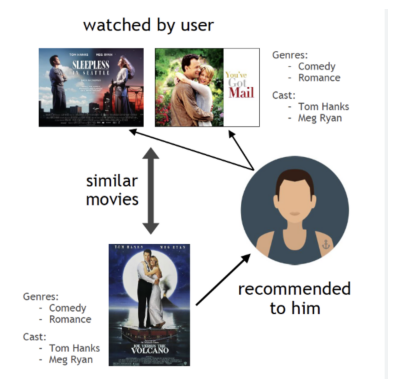

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Load the image file
img = mpimg.imread('image_content.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

<li>Based on my analysis, I found that columns like 'budget', 'revenue', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', and 'tagline' aren't directly applicable for content-based filtering. These columns mainly encompass information related to the production, release, and language aspects of the movie, rather than its content characteristics. Thus, I suggest excluding these columns from our analysis.</li>

<li>Moreover, 'vote_count' and 'vote_average' columns are typically employed in collaborative filtering scenarios. However, since we lack specific user details in this context, I propose removing these columns as well</li>

In [2]:
data.columns

Index(['title', 'cast', 'budget', 'genres', 'keywords', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'year', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [4]:
# ----------------drop the less relevant columns after copying data into a new frame
new_data = data.copy()

new_data.drop(['budget', 'revenue', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 
       'status', 'tagline', 'vote_average', 'vote_count', 'original_title'], axis=1, inplace= True)
new_data

,title,cast,genres,keywords,overview,popularity,year
0,Avatar,"GiovanniRibisi, CCHPounder, LazAlonso, ZoeSald...","Fantasy, Adventure, ScienceFiction, Action","futuristic, cultureclash, spacewar, society, f...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009
1,Pirates of the Caribbean: At World's End,"JohnnyDepp, ChowYun-fat, StellanSkarsgård, Kei...","Adventure, Action, Fantasy","eastindiatradingcompany, drugabuse, alliance, ...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007
2,Spectre,"LéaSeydoux, AndrewScott, RoryKinnear, DaveBaut...","Adventure, Crime, Action","secretagent, sequel, britishsecretservice, mi6...",A cryptic message from Bond’s past sends him o...,107.376788,2015
3,The Dark Knight Rises,"GaryOldman, MarionCotillard, TomHardy, JunoTem...","Thriller, Drama, Crime, Action","vigilante, timebomb, burglar, gothamcity, dcco...",Following the death of District Attorney Harve...,112.312950,2012
4,John Carter,"SamanthaMorton, CiaránHinds, JamesPurefoy, Tho...","Adventure, ScienceFiction, Action","medallion, princess, edgarriceburroughs, based...","John Carter is a war-weary, former military ca...",43.926995,2012
...,...,...,...,...,...,...,...
4804,El Mariachi,"PeterMarquardt, ReinolMartinez, RamiroGomez, C...","Thriller, Crime, Action","arms, unitedstates–mexicobarrier, legs, paperk...",El Mariachi just wants to play his guitar and ...,14.269792,1992
4805,Newlyweds,"EdwardBurns, DaniellaPineda, KerryBishé, Marsh...","Romance, Comedy",NaN,A newlywed couple's honeymoon is upended by th...,0.642552,2011
4806,"Signed, Sealed, Delivered","BenjaminHollingsworth, CrystalLowe, KristinBoo...","Romance, Drama, Comedy, TVMovie","date, investigation, narration, loveatfirstsig...","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013
4807,Shanghai Calling,"ZhuShimao, BillPaxton, ElizaCoupe, DanielHenne...",NaN,NaN,When ambitious New York attorney Sam is sent t...,0.857008,2012


In [5]:
new_data.head(2)['genres'] #-------------display the genres of the first two movies

0    Fantasy, Adventure, ScienceFiction, Action
1                    Adventure, Action, Fantasy
Name: genres, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=3, max_features=None,
                             strip_accents='unicode', analyzer='word',
                             token_pattern=r',', ngram_range=(1,3),
                             stop_words='english')

# ------fill the null values with empty string
new_data['genres'] = new_data['genres'].fillna('')



In [7]:
# --------------fitting the TF-IDF on the genre text
tf_matrix = vectorizer.fit_transform(new_data['genres'])
tf_matrix

<4809x3 sparse matrix of type '<class 'numpy.float64'>'
	with 7129 stored elements in Compressed Sparse Row format>

In [8]:
# -----------check the shape of the tf-matrix dataset
tf_matrix.shape

(4809, 3)

In [9]:
from sklearn.metrics.pairwise import sigmoid_kernel

# --------compute the sigmoid kernel
sig = sigmoid_kernel(tf_matrix, tf_matrix)

In [10]:
# ---------------check the first index from the sigmoid kernel
sig[0]

array([0.87006166, 0.85906733, 0.85906733, ..., 0.87006166, 0.76159416,
       0.76159416])

In [12]:
# ------------reverse mapping of indexes and movie titles
index = pd.Series(new_data.index, index=new_data['title']).drop_duplicates()
index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [13]:
# ----------create a function for content based recommendation system
def recommendations(title, sig=sig):
    # get index corresponding to original title
    idx = index[title]

    # get the pairwise similarity score
    sig_scores = list(enumerate(sig[idx]))

    # sort the movies
    sig_scores = sorted(sig_scores, key=lambda x:x[1], reverse= True)

    # scores of the 5 most similar movies
    sig_scores = sig_scores[1:6]

    # movie indexes
    movie_index = [i[0] for i in sig_scores]

    # top 5 similar movies
    return new_data['title'].iloc[movie_index]


In [14]:
# ------Testing the content based recommendation system with a random movie
recommendations('Shanghai Calling')

1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
5                                Spider-Man 3
Name: title, dtype: object